This notebook calculates reconstruction bias and RMSE for the different sampling experiments for the Southern Ocean winter and summer seasons. Reconstructions are compared to the "model truth" of the Large Ensemble Testbed. We show global maps and hovmoller diagrams.

This notebook was created by Thea Hatlen Heimdal, in collaboration with Julius Busecke and Val Bennington. 

In [1]:
import numpy as np
import pandas as pd
import xarray as xr
import pickle
import matplotlib.pyplot as plt 
import seaborn as sns

# Supporting file with functions
%run _Val_Mapping.ipynb 

In [2]:
# Loading references - pickle files of the picked LET members

path_LET = "/local/data/artemis/workspace/theimdal/saildrone/LET_pickle_files/members_LET_dict.pickle"

with open(path_LET,'rb') as handle:
    mems_dict = pickle.load(handle)

In [3]:
mems_dict

{'CESM': ['001',
  '002',
  '009',
  '010',
  '011',
  '012',
  '013',
  '014',
  '015',
  '016',
  '017',
  '018',
  '020',
  '021',
  '023',
  '024',
  '025',
  '030',
  '031',
  '034',
  '035',
  '101',
  '102',
  '103',
  '104'],
 'GFDL': ['01',
  '02',
  '03',
  '04',
  '05',
  '06',
  '08',
  '09',
  '10',
  '11',
  '12',
  '13',
  '14',
  '16',
  '17',
  '18',
  '19',
  '20',
  '22',
  '23',
  '26',
  '27',
  '28',
  '29',
  '30'],
 'CanESM2': ['r1r10',
  'r1r9',
  'r3r1',
  'r4r5',
  'r5r10',
  'r2r1',
  'r3r2',
  'r3r9',
  'r4r6',
  'r5r2',
  'r1r6',
  'r2r2',
  'r3r4',
  'r4r1',
  'r4r7',
  'r5r4',
  'r1r7',
  'r3r6',
  'r4r8',
  'r5r5',
  'r2r8',
  'r3r7',
  'r4r3',
  'r5r1',
  'r5r9']}

### Bring in reconstructions

#### SOCAT-Baseline

In [3]:
datasets_ens = []
for ens, mem_list in mems_dict.items():
    datasets_member = []
    for n_member, member in enumerate(mem_list):
        if ens == "CanESM2":
            date_str = '201712'
        else:
            date_str = '201701'
        truth_path = f"/data/artemis/simulations/LET/{ens}/member_{member}/pCO2_2D_mon_{ens}{member}_1x1_198201-{date_str}.nc"
        recon_path = f"/data/artemis/workspace/theimdal/SOCAT/models/reconstructions/xg/{ens}/member_{member}/recon_pCO2DIC_pCO2_2D_mon_{ens}_{member}_1x1_198201-201701.nc"
        kwargs = dict(chunks={'time':-1})
        
        truth = xr.open_dataset(truth_path, **kwargs).pCO2
        recon = xr.open_dataset(recon_path, **kwargs).pCO2_full_recon
        
        # assign_dimension coordinates
        truth = truth.assign_coords(status='truth')
        recon = recon.assign_coords(status='reconstructed')
        
        # make sure they have the same time coordinates
        truth = truth.assign_coords(time=recon['time'].data)
        
        member_ds = xr.concat([truth, recon], dim='status')
        
        # add member_dimension and coordinate
        member_ds = member_ds.assign_coords(n_member=n_member, member=member)
        
        datasets_member.append(member_ds)
    
    ds_ens = xr.concat(datasets_member, dim='n_member')
    ds_ens = ds_ens.assign_coords(ensemble=ens)
    
    
    datasets_ens.append(ds_ens)
    
ds_SOCAT_only = xr.concat(datasets_ens, dim='ensemble', join='override') 

#### One-lat 5 years

In [4]:
datasets_ens = []
for ens, mem_list in mems_dict.items():
    datasets_member = []
    for n_member, member in enumerate(mem_list):
        if ens == "CanESM2":
            date_str = '201712'
        else:
            date_str = '201701'
        truth_path = f"/data/artemis/simulations/LET/{ens}/member_{member}/pCO2_2D_mon_{ens}{member}_1x1_198201-{date_str}.nc"
        recon_path = f"/data/artemis/workspace/theimdal/saildrone_5/models/reconstructions/xg/{ens}/member_{member}/recon_pCO2DIC_pCO2_2D_mon_{ens}_{member}_1x1_198201-201701.nc"
        kwargs = dict(chunks={'time':-1})
        
        truth = xr.open_dataset(truth_path, **kwargs).pCO2
        recon = xr.open_dataset(recon_path, **kwargs).pCO2_recon
        
        # assign_dimension coordinates
        truth = truth.assign_coords(status='truth')
        recon = recon.assign_coords(status='reconstructed')
        
        # make sure they have the same time coordinates
        truth = truth.assign_coords(time=recon['time'].data)
        
        member_ds = xr.concat([truth, recon], dim='status')
        
        # add member_dimension and coordinate
        member_ds = member_ds.assign_coords(n_member=n_member, member=member)
        
        datasets_member.append(member_ds)
    
    ds_ens = xr.concat(datasets_member, dim='n_member')
    ds_ens = ds_ens.assign_coords(ensemble=ens)
    
    
    datasets_ens.append(ds_ens)
    
ds_Saildrone_5 = xr.concat(datasets_ens, dim='ensemble', join='override') 

#### One-lat 5 years winter

In [5]:
datasets_ens = []
for ens, mem_list in mems_dict.items():
    datasets_member = []
    for n_member, member in enumerate(mem_list):
        if ens == "CanESM2":
            date_str = '201712'
        else:
            date_str = '201701'
        truth_path = f"/data/artemis/simulations/LET/{ens}/member_{member}/pCO2_2D_mon_{ens}{member}_1x1_198201-{date_str}.nc"
        recon_path = f"/data/artemis/workspace/theimdal/saildrone_5/models/saildrone5_5x_winter/reconstructions/xg/{ens}/member_{member}/recon_pCO2DIC_pCO2_2D_mon_{ens}_{member}_1x1_198201-201701.nc"
        kwargs = dict(chunks={'time':-1})
        
        truth = xr.open_dataset(truth_path, **kwargs).pCO2
        recon = xr.open_dataset(recon_path, **kwargs).pCO2_recon
        
        # assign_dimension coordinates
        truth = truth.assign_coords(status='truth')
        recon = recon.assign_coords(status='reconstructed')
        
        # make sure they have the same time coordinates
        truth = truth.assign_coords(time=recon['time'].data)
        
        member_ds = xr.concat([truth, recon], dim='status')
        
        # add member_dimension and coordinate
        member_ds = member_ds.assign_coords(n_member=n_member, member=member)
        
        datasets_member.append(member_ds)
    
    ds_ens = xr.concat(datasets_member, dim='n_member')
    ds_ens = ds_ens.assign_coords(ensemble=ens)
    
    
    datasets_ens.append(ds_ens)
    
ds_Saildrone_5_5x = xr.concat(datasets_ens, dim='ensemble', join='override') 

#### One-lat 10 years

In [6]:
datasets_ens = []
for ens, mem_list in mems_dict.items():
    datasets_member = []
    for n_member, member in enumerate(mem_list):
        if ens == "CanESM2":
            date_str = '201712'
        else:
            date_str = '201701'
        truth_path = f"/data/artemis/simulations/LET/{ens}/member_{member}/pCO2_2D_mon_{ens}{member}_1x1_198201-{date_str}.nc"
        recon_path = f"/data/artemis/workspace/theimdal/saildrone_10_new/models/reconstructions/xg/{ens}/member_{member}/recon_pCO2DIC_pCO2_2D_mon_{ens}_{member}_1x1_198201-201701.nc"
        kwargs = dict(chunks={'time':-1})
        
        truth = xr.open_dataset(truth_path, **kwargs).pCO2
        recon = xr.open_dataset(recon_path, **kwargs).pCO2_recon
        
        # assign_dimension coordinates
        truth = truth.assign_coords(status='truth')
        recon = recon.assign_coords(status='reconstructed')
        
        # make sure they have the same time coordinates
        truth = truth.assign_coords(time=recon['time'].data)
        
        member_ds = xr.concat([truth, recon], dim='status')
        
        # add member_dimension and coordinate
        member_ds = member_ds.assign_coords(n_member=n_member, member=member)
        
        datasets_member.append(member_ds)
    
    ds_ens = xr.concat(datasets_member, dim='n_member')
    ds_ens = ds_ens.assign_coords(ensemble=ens)
    
    
    datasets_ens.append(ds_ens)
    
ds_Saildrone_10 = xr.concat(datasets_ens, dim='ensemble', join='override') 

#### 10 years year-round

In [7]:
datasets_ens = []
for ens, mem_list in mems_dict.items():
    datasets_member = []
    for n_member, member in enumerate(mem_list):
        if ens == "CanESM2":
            date_str = '201712'
        else:
            date_str = '201701'
        truth_path = f"/data/artemis/simulations/LET/{ens}/member_{member}/pCO2_2D_mon_{ens}{member}_1x1_198201-{date_str}.nc"
        recon_path = f"/data/artemis/workspace/theimdal/saildrone_10_new/models/saildrone10_shifted/reconstructions/xg/{ens}/member_{member}/recon_pCO2DIC_pCO2_2D_mon_{ens}_{member}_1x1_198201-201701.nc"
        kwargs = dict(chunks={'time':-1})
        
        truth = xr.open_dataset(truth_path, **kwargs).pCO2
        recon = xr.open_dataset(recon_path, **kwargs).pCO2_recon
        
        # assign_dimension coordinates
        truth = truth.assign_coords(status='truth')
        recon = recon.assign_coords(status='reconstructed')
        
        # make sure they have the same time coordinates
        truth = truth.assign_coords(time=recon['time'].data)
        
        member_ds = xr.concat([truth, recon], dim='status')
        
        # add member_dimension and coordinate
        member_ds = member_ds.assign_coords(n_member=n_member, member=member)
        
        datasets_member.append(member_ds)
    
    ds_ens = xr.concat(datasets_member, dim='n_member')
    ds_ens = ds_ens.assign_coords(ensemble=ens)
    
    
    datasets_ens.append(ds_ens)
    
ds_Saildrone_10_shifted = xr.concat(datasets_ens, dim='ensemble', join='override') 

#### One-lat 13 saildrones

In [8]:
datasets_ens = []
for ens, mem_list in mems_dict.items():
    datasets_member = []
    for n_member, member in enumerate(mem_list):
        if ens == "CanESM2":
            date_str = '201712'
        else:
            date_str = '201701'
        truth_path = f"/data/artemis/simulations/LET/{ens}/member_{member}/pCO2_2D_mon_{ens}{member}_1x1_198201-{date_str}.nc"
        recon_path = f"/data/artemis/workspace/theimdal/saildrone_10_new/models/saildrone10_mult_12/reconstructions/xg/{ens}/member_{member}/recon_pCO2DIC_pCO2_2D_mon_{ens}_{member}_1x1_198201-201701.nc"
        kwargs = dict(chunks={'time':-1})
        
        truth = xr.open_dataset(truth_path, **kwargs).pCO2
        recon = xr.open_dataset(recon_path, **kwargs).pCO2_recon
        
        # assign_dimension coordinates
        truth = truth.assign_coords(status='truth')
        recon = recon.assign_coords(status='reconstructed')
        
        # make sure they have the same time coordinates
        truth = truth.assign_coords(time=recon['time'].data)
        
        member_ds = xr.concat([truth, recon], dim='status')
        
        # add member_dimension and coordinate
        member_ds = member_ds.assign_coords(n_member=n_member, member=member)
        
        datasets_member.append(member_ds)
    
    ds_ens = xr.concat(datasets_member, dim='n_member')
    ds_ens = ds_ens.assign_coords(ensemble=ens)
    
    
    datasets_ens.append(ds_ens)
    
ds_Saildrone_10_mult_12 = xr.concat(datasets_ens, dim='ensemble', join='override') 

#### One-lat 13 saildrones winter

In [9]:
datasets_ens = []
for ens, mem_list in mems_dict.items():
    datasets_member = []
    for n_member, member in enumerate(mem_list):
        if ens == "CanESM2":
            date_str = '201712'
        else:
            date_str = '201701'
        truth_path = f"/data/artemis/simulations/LET/{ens}/member_{member}/pCO2_2D_mon_{ens}{member}_1x1_198201-{date_str}.nc"
        recon_path = f"/data/artemis/workspace/theimdal/saildrone_10_new/models/saildrone10_mult_12_winter/reconstructions/xg/{ens}/member_{member}/recon_pCO2DIC_pCO2_2D_mon_{ens}_{member}_1x1_198201-201701.nc"
        kwargs = dict(chunks={'time':-1})
        
        truth = xr.open_dataset(truth_path, **kwargs).pCO2
        recon = xr.open_dataset(recon_path, **kwargs).pCO2_recon
        
        # assign_dimension coordinates
        truth = truth.assign_coords(status='truth')
        recon = recon.assign_coords(status='reconstructed')
        
        # make sure they have the same time coordinates
        truth = truth.assign_coords(time=recon['time'].data)
        
        member_ds = xr.concat([truth, recon], dim='status')
        
        # add member_dimension and coordinate
        member_ds = member_ds.assign_coords(n_member=n_member, member=member)
        
        datasets_member.append(member_ds)
    
    ds_ens = xr.concat(datasets_member, dim='n_member')
    ds_ens = ds_ens.assign_coords(ensemble=ens)
    
    
    datasets_ens.append(ds_ens)
    
ds_Saildrone_10_mult_12_w = xr.concat(datasets_ens, dim='ensemble', join='override') 

#### zigzag 10 years

In [10]:
datasets_ens = []
for ens, mem_list in mems_dict.items():
    datasets_member = []
    for n_member, member in enumerate(mem_list):
        if ens == "CanESM2":
            date_str = '201712'
        else:
            date_str = '201701'
        truth_path = f"/data/artemis/simulations/LET/{ens}/member_{member}/pCO2_2D_mon_{ens}{member}_1x1_198201-{date_str}.nc"
        recon_path = f"/data/artemis/workspace/theimdal/saildrone_zigzag/models/10_years/reconstructions/xg/{ens}/member_{member}/recon_pCO2DIC_pCO2_2D_mon_{ens}_{member}_1x1_198201-201701.nc"
        kwargs = dict(chunks={'time':-1})
        
        truth = xr.open_dataset(truth_path, **kwargs).pCO2
        recon = xr.open_dataset(recon_path, **kwargs).pCO2_recon
        
        # assign_dimension coordinates
        truth = truth.assign_coords(status='truth')
        recon = recon.assign_coords(status='reconstructed')
        
        # make sure they have the same time coordinates
        truth = truth.assign_coords(time=recon['time'].data)
        
        member_ds = xr.concat([truth, recon], dim='status')
        
        # add member_dimension and coordinate
        member_ds = member_ds.assign_coords(n_member=n_member, member=member)
        
        datasets_member.append(member_ds)
    
    ds_ens = xr.concat(datasets_member, dim='n_member')
    ds_ens = ds_ens.assign_coords(ensemble=ens)
    
    
    datasets_ens.append(ds_ens)
    
ds_Saildrone_zigzag_10 = xr.concat(datasets_ens, dim='ensemble', join='override') 

#### zigzag 10 years winter

In [11]:
datasets_ens = []
for ens, mem_list in mems_dict.items():
    datasets_member = []
    for n_member, member in enumerate(mem_list):
        if ens == "CanESM2":
            date_str = '201712'
        else:
            date_str = '201701'
        truth_path = f"/data/artemis/simulations/LET/{ens}/member_{member}/pCO2_2D_mon_{ens}{member}_1x1_198201-{date_str}.nc"
        recon_path = f"/data/artemis/workspace/theimdal/saildrone_zigzag/models/10_years_winter/reconstructions/xg/{ens}/member_{member}/recon_pCO2DIC_pCO2_2D_mon_{ens}_{member}_1x1_198201-201701.nc"
        kwargs = dict(chunks={'time':-1})
        
        truth = xr.open_dataset(truth_path, **kwargs).pCO2
        recon = xr.open_dataset(recon_path, **kwargs).pCO2_recon
        
        # assign_dimension coordinates
        truth = truth.assign_coords(status='truth')
        recon = recon.assign_coords(status='reconstructed')
        
        # make sure they have the same time coordinates
        truth = truth.assign_coords(time=recon['time'].data)
        
        member_ds = xr.concat([truth, recon], dim='status')
        
        # add member_dimension and coordinate
        member_ds = member_ds.assign_coords(n_member=n_member, member=member)
        
        datasets_member.append(member_ds)
    
    ds_ens = xr.concat(datasets_member, dim='n_member')
    ds_ens = ds_ens.assign_coords(ensemble=ens)
    
    
    datasets_ens.append(ds_ens)
    
ds_Saildrone_zigzag_10_w = xr.concat(datasets_ens, dim='ensemble', join='override') 

#### zigzag 5 years

In [12]:
datasets_ens = []
for ens, mem_list in mems_dict.items():
    datasets_member = []
    for n_member, member in enumerate(mem_list):
        if ens == "CanESM2":
            date_str = '201712'
        else:
            date_str = '201701'
        truth_path = f"/data/artemis/simulations/LET/{ens}/member_{member}/pCO2_2D_mon_{ens}{member}_1x1_198201-{date_str}.nc"
        recon_path = f"/data/artemis/workspace/theimdal/saildrone_zigzag/models/5_years_x12/reconstructions/xg/{ens}/member_{member}/recon_pCO2DIC_pCO2_2D_mon_{ens}_{member}_1x1_198201-201701.nc"
        kwargs = dict(chunks={'time':-1})
        
        truth = xr.open_dataset(truth_path, **kwargs).pCO2
        recon = xr.open_dataset(recon_path, **kwargs).pCO2_recon
        
        # assign_dimension coordinates
        truth = truth.assign_coords(status='truth')
        recon = recon.assign_coords(status='reconstructed')
        
        # make sure they have the same time coordinates
        truth = truth.assign_coords(time=recon['time'].data)
        
        member_ds = xr.concat([truth, recon], dim='status')
        
        # add member_dimension and coordinate
        member_ds = member_ds.assign_coords(n_member=n_member, member=member)
        
        datasets_member.append(member_ds)
    
    ds_ens = xr.concat(datasets_member, dim='n_member')
    ds_ens = ds_ens.assign_coords(ensemble=ens)
    
    
    datasets_ens.append(ds_ens)
    
ds_Saildrone_zigzag_5_x12 = xr.concat(datasets_ens, dim='ensemble', join='override') 

#### zigzag 5 years winter

In [13]:
datasets_ens = []
for ens, mem_list in mems_dict.items():
    datasets_member = []
    for n_member, member in enumerate(mem_list):
        if ens == "CanESM2":
            date_str = '201712'
        else:
            date_str = '201701'
        truth_path = f"/data/artemis/simulations/LET/{ens}/member_{member}/pCO2_2D_mon_{ens}{member}_1x1_198201-{date_str}.nc"
        recon_path = f"/data/artemis/workspace/theimdal/saildrone_zigzag/models/5_years_x12_winter/reconstructions/xg/{ens}/member_{member}/recon_pCO2DIC_pCO2_2D_mon_{ens}_{member}_1x1_198201-201701.nc"
        kwargs = dict(chunks={'time':-1})
        
        truth = xr.open_dataset(truth_path, **kwargs).pCO2
        recon = xr.open_dataset(recon_path, **kwargs).pCO2_recon
        
        # assign_dimension coordinates
        truth = truth.assign_coords(status='truth')
        recon = recon.assign_coords(status='reconstructed')
        
        # make sure they have the same time coordinates
        truth = truth.assign_coords(time=recon['time'].data)
        
        member_ds = xr.concat([truth, recon], dim='status')
        
        # add member_dimension and coordinate
        member_ds = member_ds.assign_coords(n_member=n_member, member=member)
        
        datasets_member.append(member_ds)
    
    ds_ens = xr.concat(datasets_member, dim='n_member')
    ds_ens = ds_ens.assign_coords(ensemble=ens)
    
    
    datasets_ens.append(ds_ens)
    
ds_Saildrone_zigzag_5_x12_w = xr.concat(datasets_ens, dim='ensemble', join='override') 

### Functions for selecting winter or summer months

### <font color='blue'>Southern Hem WINTER (june, july, aug)</font> 

In [15]:
#function for selecting Southern hemisphere winter (june, july, august)
def is_jja(month):
    return (month >= 6) & (month <= 8)

In [16]:
SO_winter_socat = ds_SOCAT_only.sel(time=is_jja(ds_SOCAT_only["time.month"]))
SO_winter_sail5 = ds_Saildrone_5.sel(time=is_jja(ds_Saildrone_5["time.month"]))
SO_winter_sail5_5x = ds_Saildrone_5_5x.sel(time=is_jja(ds_Saildrone_5_5x["time.month"]))
SO_winter_sail10 = ds_Saildrone_10.sel(time=is_jja(ds_Saildrone_10["time.month"]))
SO_winter_sail10_shifted = ds_Saildrone_10_shifted.sel(time=is_jja(ds_Saildrone_10_shifted["time.month"]))
SO_winter_sail10_mult_12 = ds_Saildrone_10_mult_12.sel(time=is_jja(ds_Saildrone_10_mult_12["time.month"]))
SO_winter_sail10_mult_12_w = ds_Saildrone_10_mult_12_w.sel(time=is_jja(ds_Saildrone_10_mult_12_w["time.month"]))
SO_winter_sail_zigzag_10 = ds_Saildrone_zigzag_10.sel(time=is_jja(ds_Saildrone_zigzag_10["time.month"]))
SO_winter_sail_zigzag_10_w = ds_Saildrone_zigzag_10_w.sel(time=is_jja(ds_Saildrone_zigzag_10_w["time.month"]))
SO_winter_sail_zigzag_5 = ds_Saildrone_zigzag_5_x12.sel(time=is_jja(ds_Saildrone_zigzag_5_x12["time.month"]))
SO_winter_sail_zigzag_5_w = ds_Saildrone_zigzag_5_x12_w.sel(time=is_jja(ds_Saildrone_zigzag_5_x12_w["time.month"]))

/home/theimdal/.conda/envs/cesm_play/lib/python3.8/site-packages/xarray/core/indexing.py:1369: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  return self.array[key]


### <font color='orange'>Southern Hem SUMMER (december, january, february)</font> 

In [9]:
#function for selecting Southern hemisphere summer (december, january, february)  
def is_djf(month):
    return (month >= 12) | (month <= 2) 

In [10]:
SO_summer_socat = ds_SOCAT_only.sel(time=is_djf(ds_SOCAT_only["time.month"]))
SO_summer_sail5 = ds_Saildrone_5.sel(time=is_djf(ds_Saildrone_5["time.month"]))
SO_summer_sail5_w = ds_Saildrone_5_5x.sel(time=is_djf(ds_Saildrone_5["time.month"]))
SO_summer_sail10 = ds_Saildrone_10.sel(time=is_djf(ds_Saildrone_10["time.month"]))
SO_summer_sail10_shifted = ds_Saildrone_10_shifted.sel(time=is_djf(ds_Saildrone_10_shifted["time.month"]))
SO_summer_sail10_mult_12 = ds_Saildrone_10_mult_12.sel(time=is_djf(ds_Saildrone_10_mult_12["time.month"]))
SO_summer_sail10_mult_12_w = ds_Saildrone_10_mult_12_w.sel(time=is_djf(ds_Saildrone_10_mult_12_w["time.month"]))
SO_summer_sail_zigzag_10 = ds_Saildrone_zigzag_10.sel(time=is_djf(ds_Saildrone_zigzag_10["time.month"]))
SO_summer_sail_zigzag_10_w = ds_Saildrone_zigzag_10_w.sel(time=is_djf(ds_Saildrone_zigzag_10_w["time.month"]))
SO_summer_sail_zigzag_5 = ds_Saildrone_zigzag_5_x12.sel(time=is_djf(ds_Saildrone_zigzag_5_x12["time.month"]))
SO_summer_sail_zigzag_5_w = ds_Saildrone_zigzag_5_x12_w.sel(time=is_djf(ds_Saildrone_zigzag_5_x12_w["time.month"]))

/home/theimdal/.conda/envs/cesm_play/lib/python3.8/site-packages/xarray/core/indexing.py:1369: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  return self.array[key]


### Bias

### <font color='blue'>Southern Hemisphere winter</font> 

In [ ]:
# Calculate bias
timeline_SOCAT = SO_winter_socat.diff('status').sel(time=slice("1982-01-01","2016-12-31")).groupby("time.year").mean(['n_member', 'ensemble', 'time', 'xlon', 'status'])
timeline_Sail_zigzag_10_w = SO_winter_sail_zigzag_10_w.diff('status').sel(time=slice("1982-01-01","2016-12-31")).groupby("time.year").mean(['n_member', 'ensemble', 'time', 'xlon', 'status'])

/home/theimdal/.conda/envs/cesm_play/lib/python3.8/site-packages/dask/array/numpy_compat.py:39: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


Text(0.5, 1.0, 'Baseline Run (SOCAT) S Hem winter months (Jun, Jul, Aug)')

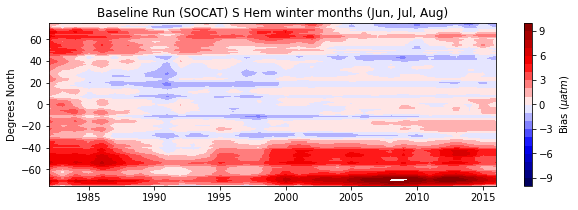

In [80]:
fig = plt.figure(figsize=(10,3))
plt.contourf(range(1982,2017),timeline_SOCAT.ylat,(timeline_SOCAT).transpose(),levels=np.linspace(-10,10,21),cmap='seismic')
plt.colorbar(label='Bias ($\mu atm$)')
plt.ylim(-75,75)
plt.ylabel("Degrees North")
plt.title("Baseline Run (SOCAT) S Hem winter months (Jun, Jul, Aug)")
#fig.savefig(f"{fig_output_dir}/Bias_2016_wo_saildrone.jpg",dpi=300)

/home/theimdal/.conda/envs/cesm_play/lib/python3.8/site-packages/dask/array/numpy_compat.py:39: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


Text(0.5, 1.0, 'Change in bias S. Hem winter - ZZ_10y_winter')

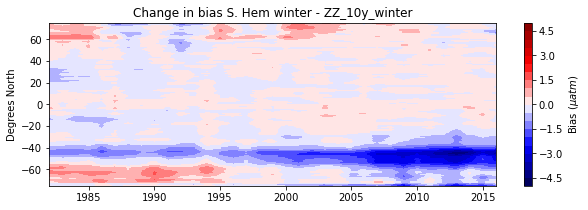

In [81]:
fig = plt.figure(figsize=(10,3))
plt.contourf(range(1982,2017),timeline_SOCAT.ylat,(timeline_Sail_zigzag_10_w-timeline_SOCAT).transpose(),levels=np.linspace(-5,5,21),cmap='seismic')
plt.colorbar(label='Bias ($\mu atm$)')
plt.ylim(-75,75)
plt.ylabel("Degrees North")
plt.title("Change in bias S. Hem winter - ZZ_10y_winter")
#fig.savefig(f"{fig_output_dir}/Bias_2016_wo_saildrone.jpg",dpi=300)

### <font color='orange'>Southern Hemisphere summer</font> 

In [15]:
timeline_SOCAT_summer = SO_summer_socat.diff('status').sel(time=slice("1982-01-01","2016-12-31")).groupby("time.year").mean(['n_member', 'ensemble', 'time', 'xlon', 'status'])
timeline_Sail10_mult_12_w_summer_12 = SO_summer_sail10_mult_12_w.diff('status').sel(time=slice("1982-01-01","2016-12-31")).groupby("time.year").mean(['n_member', 'ensemble', 'time', 'xlon', 'status'])

/home/theimdal/.conda/envs/cesm_play/lib/python3.8/site-packages/dask/array/numpy_compat.py:39: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


Text(0.5, 1.0, 'Bias S Hem summer months (Dec, Jan, Feb) SOCAT only')

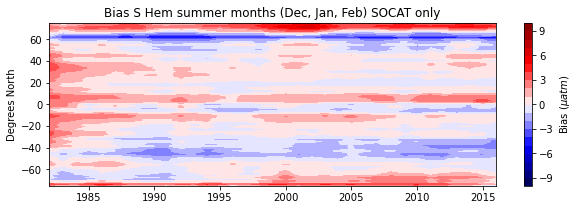

In [30]:
fig = plt.figure(figsize=(10,3))
plt.contourf(range(1982,2017),timeline_SOCAT_summer.ylat,(timeline_SOCAT_summer).transpose(),levels=np.linspace(-10,10,21),cmap='seismic')
plt.colorbar(label='Bias ($\mu atm$)')
plt.ylim(-75,75)
plt.ylabel("Degrees North")
plt.title("Bias S Hem summer months (Dec, Jan, Feb) SOCAT only")
#fig.savefig(f"{fig_output_dir}/Bias_2016_wo_saildrone.jpg",dpi=300)

/home/theimdal/.conda/envs/cesm_play/lib/python3.8/site-packages/dask/array/numpy_compat.py:39: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


Text(0.5, 1.0, 'Change in bias summer months (Dec, Jan, Feb) Sail10_12x')

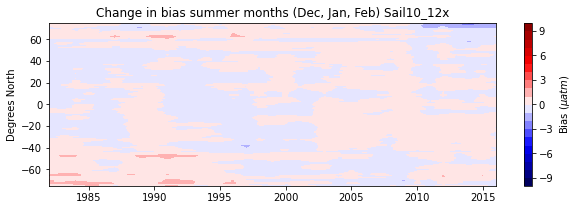

In [94]:
fig = plt.figure(figsize=(10,3))
plt.contourf(range(1982,2017),timeline_SOCAT_summer.ylat,(timeline_Sail10_mult_summer_12-timeline_SOCAT_summer).transpose(),levels=np.linspace(-10,10,21),cmap='seismic')
plt.colorbar(label='Bias ($\mu atm$)')
plt.ylim(-75,75)
plt.ylabel("Degrees North")
plt.title("Change in bias summer months (Dec, Jan, Feb) Sail10_12x")
#fig.savefig(f"{fig_output_dir}/Bias_2016_wo_saildrone.jpg",dpi=300)

### Maps

In [183]:
# Mean bias (globally, 2006/2012-2016) for all experiments
bias_socat_map_0616 = SO_winter_socat.diff('status').sel(time=slice("2006-01-01","2016-12-31")).mean(["n_member", "ensemble", "status"])
bias_socat_map_1216 = SO_winter_socat.diff('status').sel(time=slice("2012-01-01","2016-12-31")).mean(["n_member", "ensemble", "status"])
bias_sail5_map_0616 = SO_winter_sail5.diff('status').sel(time=slice("2012-01-01","2016-12-31")).mean(["n_member", "ensemble", "status"])
bias_sail5_winter_map_0616 = SO_winter_sail5_5x.diff('status').sel(time=slice("2012-01-01","2016-12-31")).mean(["n_member", "ensemble", "status"])
bias_sail10_map_0616 = SO_winter_sail10.diff('status').sel(time=slice("2006-01-01","2016-12-31")).mean(["n_member", "ensemble", "status"])
bias_sail10_shifted_map_0616 = SO_winter_sail10_shifted.diff('status').sel(time=slice("2006-01-01","2016-12-31")).mean(["n_member", "ensemble", "status"])
bias_sail10_x12_map_0616 = SO_winter_sail10_mult_12.diff('status').sel(time=slice("2006-01-01","2016-12-31")).mean(["n_member", "ensemble", "status"])
bias_sail10_x12_winter_map_0616 = SO_winter_sail10_mult_12_w.diff('status').sel(time=slice("2006-01-01","2016-12-31")).mean(["n_member", "ensemble", "status"])
bias_sail_zigzag_10_map_0616 = SO_winter_sail_zigzag_10.diff('status').sel(time=slice("2006-01-01","2016-12-31")).mean(["n_member", "ensemble", "status"])
bias_sail_zigzag_10_w_map_0616 = SO_winter_sail_zigzag_10_w.diff('status').sel(time=slice("2006-01-01","2016-12-31")).mean(["n_member", "ensemble", "status"])
bias_sail_zigzag_5_map_0616 = SO_winter_sail_zigzag_5.diff('status').sel(time=slice("2012-01-01","2016-12-31")).mean(["n_member", "ensemble", "status"])
bias_sail_zigzag_5_w_map_0616 = SO_winter_sail_zigzag_5_w.diff('status').sel(time=slice("2012-01-01","2016-12-31")).mean(["n_member", "ensemble", "status"])

In [184]:
#change in bias from SOCAT-baseline
map_new_bias_5_0616 = bias_sail5_map_0616-bias_socat_map_1216
map_new_bias_5_winter_0616 = bias_sail5_winter_map_0616-bias_socat_map_1216
map_new_bias_10_0616 = bias_sail10_map_0616-bias_socat_map_0616
map_new_bias_10_shifted_0616 = bias_sail10_shifted_map_0616-bias_socat_map_0616
map_new_bias_10_12x_0616 = bias_sail10_x12_map_0616-bias_socat_map_0616
map_new_bias_10_12x_winter_0616 = bias_sail10_x12_winter_map_0616-bias_socat_map_0616
map_new_bias_zigzag_10_0616 = bias_sail_zigzag_10_map_0616-bias_socat_map_0616
map_new_bias_zigzag_10_winter_0616 = bias_sail_zigzag_10_w_map_0616-bias_socat_map_0616
map_new_bias_zigzag_5_0616 = bias_sail_zigzag_5_map_0616-bias_socat_map_1216
map_new_bias_zigzag_5_winter_0616 = bias_sail_zigzag_5_w_map_0616-bias_socat_map_1216

/home/theimdal/.conda/envs/cesm_play/lib/python3.8/site-packages/dask/array/numpy_compat.py:39: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
<ipython-input-63-d0f74f34cbc9>:14: RuntimeWarning: Mean of empty slice
  map_sel = np.nanmean(bias_socat_map_0616, axis=0)
/home/theimdal/.conda/envs/cesm_play/lib/python3.8/site-packages/cartopy/mpl/geoaxes.py:1597: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  X, Y, C, shading = self._pcolorargs('pcolormesh', *args,


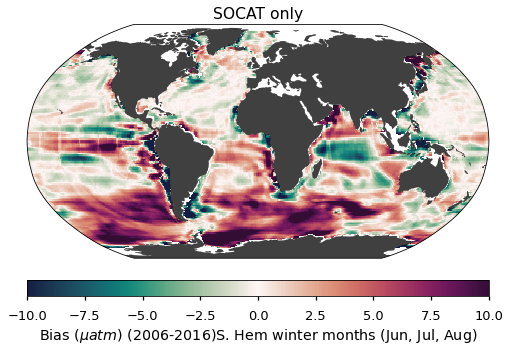

In [63]:
vrange = [-10, 10, 1]
fig_shape = (1,1)
cmap = cm.cm.curl
lab = f'Bias ($\mu atm$) (2006-2016)S. Hem winter months (Jun, Jul, Aug)'
   
      
with plt.style.context('seaborn-talk'):
    fig = plt.figure(figsize=(15,5))

    ### Mask
    dia = SpatialMap2(nrows_ncols=fig_shape, fig=fig, cbar_location='bottom', cbar_orientation='horizontal')
    
    
    map_sel = np.nanmean(bias_socat_map_0616, axis=0)
    sub = dia.add_plot(lat = bias_socat_map_0616['ylat'], 
                           lon = bias_socat_map_0616['xlon'], 
                           data = map_sel, 
                           vrange=vrange[0:2],
                           shading='flat',
                           cmap=cmap, 
                           ax=0)
    #print(np.nanmean(np.abs(map_sel.T)))
    dia.set_title("SOCAT only", 0, loc="center")
    
    col = dia.add_colorbar(sub)
    dia.set_cbar_xlabel(col, lab)
    dia.grid[0].gridlines(draw_labels=True)

#fig.savefig(f"{fig_output_dir}/Bias_Maps_Residual_saildrone5_10yrs.jpg",dpi=300)

/home/theimdal/.conda/envs/cesm_play/lib/python3.8/site-packages/dask/array/numpy_compat.py:39: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
<ipython-input-65-2f74f59ae683>:14: RuntimeWarning: Mean of empty slice
  map_sel = np.nanmean(map_new_bias_5_0616 , axis=0)
/home/theimdal/.conda/envs/cesm_play/lib/python3.8/site-packages/cartopy/mpl/geoaxes.py:1597: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  X, Y, C, shading = self._pcolorargs('pcolormesh', *args,
<ipython-input-65-2f74f59ae683>:25: RuntimeWarning: Mean of empty slice
  map_sel = np.nanmean(map_new_bias_5_winter_0616, axis=0)
<ipython-input-65-2f74f59ae683>:35: RuntimeWarning: Mean of empty slice
  map_sel = np.nanmean(m

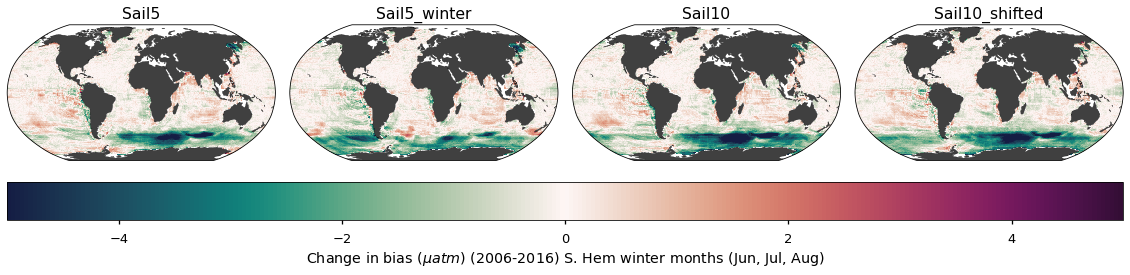

In [65]:
vrange = [-5, 5, 1]
fig_shape = (1,4)
cmap = cm.cm.curl
lab = f'Change in bias ($\mu atm$) S. Hem winter (2006/2012-2016)'
   
      
with plt.style.context('seaborn-talk'):
    fig = plt.figure(figsize=(20,5))

    ### Mask
    dia = SpatialMap2(nrows_ncols=fig_shape, fig=fig, cbar_location='bottom', cbar_orientation='horizontal')
    
    
    map_sel = np.nanmean(map_new_bias_5_0616 , axis=0)
    sub = dia.add_plot(lat = map_new_bias_5_0616 ['ylat'], 
                           lon = map_new_bias_5_0616 ['xlon'], 
                           data = map_sel, 
                           vrange=vrange[0:2],
                           shading='flat',
                           cmap=cmap, 
                           ax=0)
    #print(np.nanmean(np.abs(map_sel.T)))
    dia.set_title("ORIG_5y", 0, loc="center")
    
    map_sel = np.nanmean(map_new_bias_5_winter_0616, axis=0)
    sub = dia.add_plot(lat = map_new_bias_5_winter_0616 ['ylat'], 
                           lon = map_new_bias_5_winter_0616 ['xlon'], 
                           data = map_sel, 
                           vrange=vrange[0:2],
                           shading='flat',
                           cmap=cmap, 
                           ax=1)
    dia.set_title("ORIG_5y_winter", 1, loc="center")
    
    map_sel = np.nanmean(map_new_bias_10_0616, axis=0)
    sub = dia.add_plot(lat = map_new_bias_10_0616 ['ylat'], 
                           lon = map_new_bias_10_0616 ['xlon'], 
                           data = map_sel, 
                           vrange=vrange[0:2],
                           shading='flat',
                           cmap=cmap, 
                           ax=2)
    dia.set_title("ORIG_10y", 2, loc="center")
    
    map_sel = np.nanmean(map_new_bias_10_shifted_0616, axis=0)
    sub = dia.add_plot(lat = map_new_bias_10_shifted_0616 ['ylat'], 
                           lon = map_new_bias_10_shifted_0616 ['xlon'], 
                           data = map_sel, 
                           vrange=vrange[0:2],
                           shading='flat',
                           cmap=cmap, 
                           ax=3)
    dia.set_title("ORIG_10y_shifted", 3, loc="center")
    
    map_sel = np.nanmean(map_new_bias_10_12x_0616, axis=0)
    sub = dia.add_plot(lat = map_new_bias_10_12x_0616 ['ylat'], 
                           lon = map_new_bias_10_12x_0616 ['xlon'], 
                           data = map_sel, 
                           vrange=vrange[0:2],
                           shading='flat',
                           cmap=cmap, 
                           ax=4)
    dia.set_title("ORIG_10y_x13", 4, loc="center")
    
    map_sel = np.nanmean(map_new_bias_10_12x_winter_0616, axis=0)
    sub = dia.add_plot(lat = map_new_bias_10_12x_winter_0616 ['ylat'], 
                           lon = map_new_bias_10_12x_winter_0616 ['xlon'], 
                           data = map_sel, 
                           vrange=vrange[0:2],
                           shading='flat',
                           cmap=cmap, 
                           ax=5)
    dia.set_title("ORIG_10y_x13_winter", 5, loc="center")
    
    map_sel = np.nanmean(map_new_bias_zigzag_10_0616, axis=0)
    sub = dia.add_plot(lat = map_new_bias_zigzag_10_0616['ylat'], 
                           lon = map_new_bias_zigzag_10_0616['xlon'], 
                           data = map_sel, 
                           vrange=vrange[0:2],
                           shading='flat',
                           cmap=cmap, 
                           ax=6)
    #print(np.nanmean(np.abs(map_sel.T)))
    dia.set_title("ZZ_5y", 6, loc="center")
    
    map_sel = np.nanmean(map_new_bias_zigzag_10_winter_0616, axis=0)
    sub = dia.add_plot(lat = map_new_bias_zigzag_10_winter_0616['ylat'], 
                           lon = map_new_bias_zigzag_10_winter_0616['xlon'], 
                           data = map_sel, 
                           vrange=vrange[0:2],
                           shading='flat',
                           cmap=cmap, 
                           ax=7)
    dia.set_title("ZZ_5y_winter", 7, loc="center")
    
    map_sel = np.nanmean(map_new_bias_zigzag_10_0616, axis=0)
    sub = dia.add_plot(lat = map_new_bias_zigzag_10_0616['ylat'], 
                           lon = map_new_bias_zigzag_10_0616['xlon'], 
                           data = map_sel, 
                           vrange=vrange[0:2],
                           shading='flat',
                           cmap=cmap, 
                           ax=8)
    #print(np.nanmean(np.abs(map_sel.T)))
    dia.set_title("ZZ_10y", 8, loc="center")
    
    map_sel = np.nanmean(map_new_bias_zigzag_10_winter_0616, axis=0)
    sub = dia.add_plot(lat = map_new_bias_zigzag_10_winter_0616['ylat'], 
                           lon = map_new_bias_zigzag_10_winter_0616['xlon'], 
                           data = map_sel, 
                           vrange=vrange[0:2],
                           shading='flat',
                           cmap=cmap, 
                           ax=9)
    dia.set_title("ZZ_10y_winter", 9, loc="center")
    
    col = dia.add_colorbar(sub)
    dia.set_cbar_xlabel(col, lab)
    #dia.grid[0].gridlines(draw_labels=True)

#fig.savefig(f"{fig_output_dir}/Bias_Maps_Residual_saildrone5_10yrs.jpg",dpi=300)

## RMSE

In [17]:
#Calculate RMSE for all experiments

rmse_SO_winter_socat_timeline = xr.ufuncs.sqrt(((SO_winter_socat.diff('status'))**2).sel(time=slice("1982-01-01","2016-12-31")).groupby("time.year").mean(['n_member', 'ensemble', 'time', 'xlon', 'status']))
rmse_SO_winter_sail5_timeline = xr.ufuncs.sqrt(((SO_winter_sail5.diff('status'))**2).sel(time=slice("1982-01-01","2016-12-31")).groupby("time.year").mean(['n_member', 'ensemble', 'time', 'xlon', 'status']))
rmse_SO_winter_sail5_5x_timeline = xr.ufuncs.sqrt(((SO_winter_sail5_5x.diff('status'))**2).sel(time=slice("1982-01-01","2016-12-31")).groupby("time.year").mean(['n_member', 'ensemble', 'time', 'xlon', 'status']))
rmse_SO_winter_sail10_timeline = xr.ufuncs.sqrt(((SO_winter_sail10.diff('status'))**2).sel(time=slice("1982-01-01","2016-12-31")).groupby("time.year").mean(['n_member', 'ensemble', 'time', 'xlon', 'status']))
rmse_SO_winter_sail10_shifted_timeline = xr.ufuncs.sqrt(((SO_winter_sail10_shifted.diff('status'))**2).sel(time=slice("1982-01-01","2016-12-31")).groupby("time.year").mean(['n_member', 'ensemble', 'time', 'xlon', 'status']))
rmse_SO_winter_sail10_12x_timeline = xr.ufuncs.sqrt(((SO_winter_sail10_mult_12.diff('status'))**2).sel(time=slice("1982-01-01","2016-12-31")).groupby("time.year").mean(['n_member', 'ensemble', 'time', 'xlon', 'status']))
rmse_SO_winter_sail10_12x_w_timeline = xr.ufuncs.sqrt(((SO_winter_sail10_mult_12_w.diff('status'))**2).sel(time=slice("1982-01-01","2016-12-31")).groupby("time.year").mean(['n_member', 'ensemble', 'time', 'xlon', 'status']))
rmse_SO_winter_zigzag_10_timeline = xr.ufuncs.sqrt(((SO_winter_sail_zigzag_10.diff('status'))**2).sel(time=slice("1982-01-01","2016-12-31")).groupby("time.year").mean(['n_member', 'ensemble', 'time', 'xlon', 'status']))
rmse_SO_winter_zigzag_10_w_timeline = xr.ufuncs.sqrt(((SO_winter_sail_zigzag_10_w.diff('status'))**2).sel(time=slice("1982-01-01","2016-12-31")).groupby("time.year").mean(['n_member', 'ensemble', 'time', 'xlon', 'status']))
rmse_SO_winter_zigzag_5_timeline = xr.ufuncs.sqrt(((SO_winter_sail_zigzag_5.diff('status'))**2).sel(time=slice("1982-01-01","2016-12-31")).groupby("time.year").mean(['n_member', 'ensemble', 'time', 'xlon', 'status']))
rmse_SO_winter_zigzag_5_w_timeline = xr.ufuncs.sqrt(((SO_winter_sail_zigzag_5_w.diff('status'))**2).sel(time=slice("1982-01-01","2016-12-31")).groupby("time.year").mean(['n_member', 'ensemble', 'time', 'xlon', 'status']))

/home/theimdal/.conda/envs/cesm_play/lib/python3.8/site-packages/dask/array/numpy_compat.py:39: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/theimdal/.conda/envs/cesm_play/lib/python3.8/site-packages/dask/array/numpy_compat.py:39: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/theimdal/.conda/envs/cesm_play/lib/python3.8/site-packages/dask/array/numpy_compat.py:39: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/theimdal/.conda/envs/cesm_play/lib/python3.8/site-packages/dask/array/numpy_compat.py:39: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/theimdal/.conda/envs/cesm_play/lib/python3.8/site-packages/dask/array/numpy_compat.py:39: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/theimdal/.conda/envs/cesm_play/lib/python3.8/site-packages/dask/array/numpy_compat.p

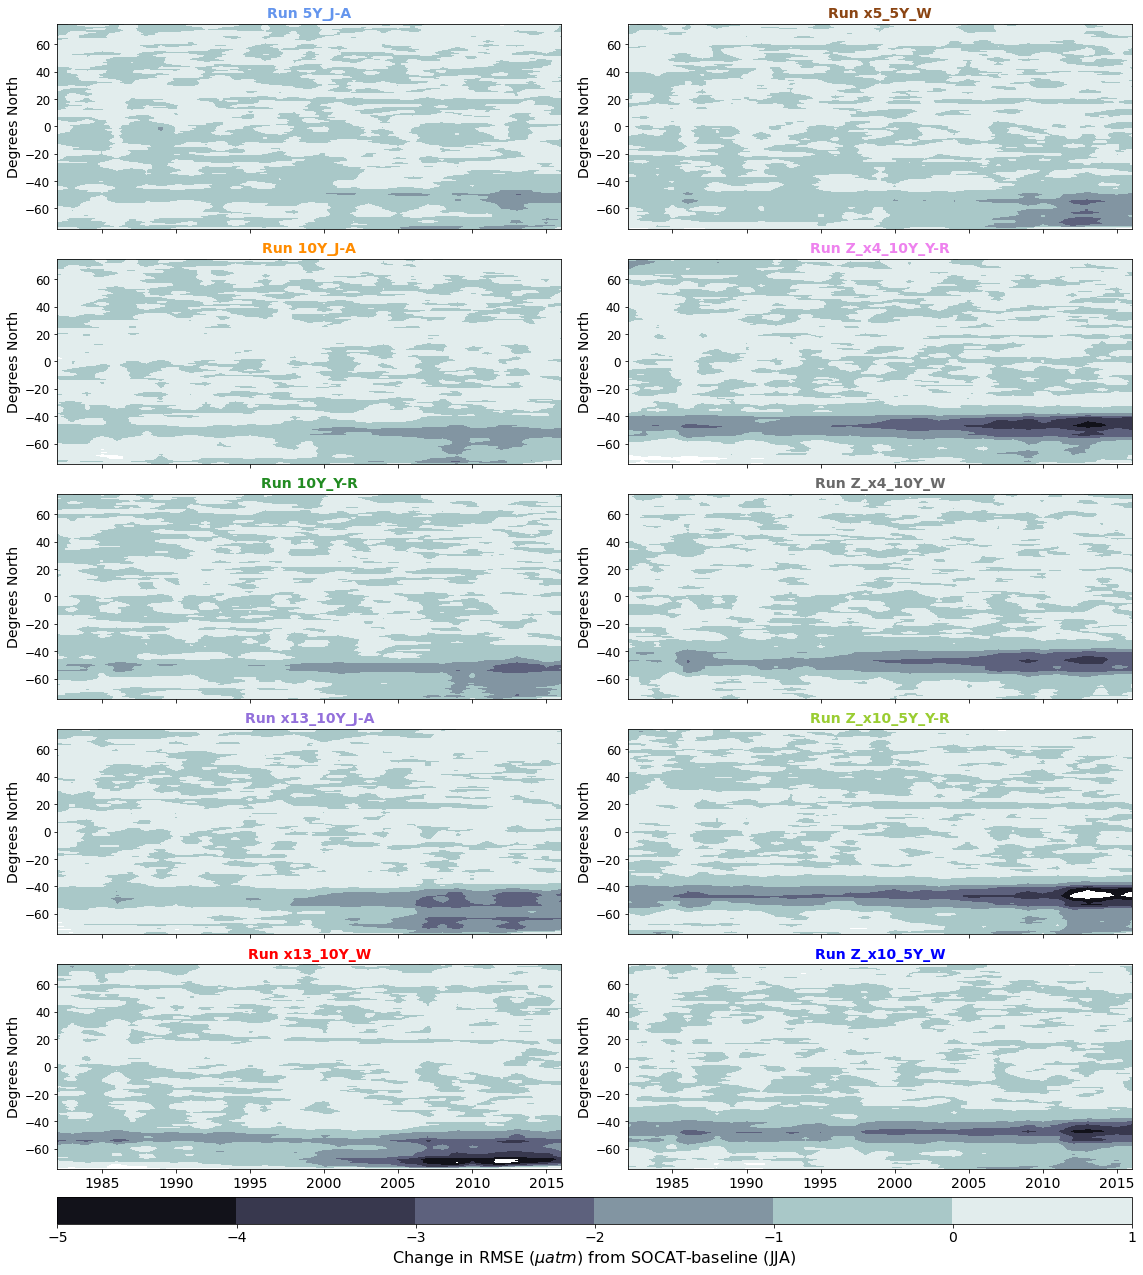

In [18]:
fig, ax = plt.subplots(5,2, figsize=(16,20), sharex=True)

map_plot = ax[0,0].contourf(range(1982,2017),rmse_SO_winter_socat_timeline.ylat,(rmse_SO_winter_sail5_timeline-rmse_SO_winter_socat_timeline).transpose(),levels=np.linspace(-5,1,7),cmap='bone') #levels, cmap and extend are optional
ax[0,0].set_ylabel("Degrees North", fontsize=14)
ax[0,0].set_ylim(-75,75)
ax[0,0].yaxis.set_tick_params(labelsize=12)
ax[0,0].set_title('Run 5Y_J-A', fontsize=14, fontweight="bold", color="cornflowerblue")

ax[1,0].contourf(range(1982,2017),rmse_SO_winter_socat_timeline.ylat,(rmse_SO_winter_sail10_timeline-rmse_SO_winter_socat_timeline).transpose(),levels=np.linspace(-5,1,7),cmap='bone')
ax[1,0].set_ylabel("Degrees North", fontsize=14)
ax[1,0].set_ylim(-75,75)
ax[1,0].yaxis.set_tick_params(labelsize=12)
ax[1,0].set_title('Run 10Y_J-A', fontsize=14, fontweight="bold", color="darkorange")

ax[2,0].contourf(range(1982,2017),rmse_SO_winter_socat_timeline.ylat,(rmse_SO_winter_sail10_shifted_timeline-rmse_SO_winter_socat_timeline).transpose(),levels=np.linspace(-5,1,7),cmap='bone')
ax[2,0].set_ylabel("Degrees North", fontsize=14)
ax[2,0].set_ylim(-75,75)
ax[2,0].yaxis.set_tick_params(labelsize=12)
ax[2,0].set_title('Run 10Y_Y-R', fontsize=14, fontweight="bold", color="forestgreen")

ax[3,0].contourf(range(1982,2017),rmse_SO_winter_socat_timeline.ylat,(rmse_SO_winter_sail10_12x_timeline-rmse_SO_winter_socat_timeline).transpose(),levels=np.linspace(-5,1,7),cmap='bone')
ax[3,0].set_ylabel("Degrees North", fontsize=14)
ax[3,0].set_ylim(-75,75)
ax[3,0].yaxis.set_tick_params(labelsize=12)
ax[3,0].set_title('Run x13_10Y_J-A', fontsize=14, fontweight="bold", color="mediumpurple")

ax[4,0].contourf(range(1982,2017),rmse_SO_winter_socat_timeline.ylat,(rmse_SO_winter_sail10_12x_w_timeline-rmse_SO_winter_socat_timeline).transpose(),levels=np.linspace(-5,1,7),cmap='bone')
ax[4,0].set_ylabel("Degrees North", fontsize=14)
ax[4,0].set_ylim(-75,75)
ax[4,0].yaxis.set_tick_params(labelsize=12)
ax[4,0].xaxis.set_tick_params(labelsize=14)
ax[4,0].set_title('Run x13_10Y_W', fontsize=14, fontweight="bold", color="red")

ax[0,1].contourf(range(1982,2017),rmse_SO_winter_socat_timeline.ylat,(rmse_SO_winter_sail5_5x_timeline-rmse_SO_winter_socat_timeline).transpose(),levels=np.linspace(-5,1,7),cmap='bone')
ax[0,1].set_ylabel("Degrees North", fontsize=14)
ax[0,1].set_ylim(-75,75)
ax[0,1].yaxis.set_tick_params(labelsize=12)
ax[0,1].set_title('Run x5_5Y_W', fontsize=14, fontweight="bold", color="saddlebrown")

ax[1,1].contourf(range(1982,2017),rmse_SO_winter_socat_timeline.ylat,(rmse_SO_winter_zigzag_10_timeline-rmse_SO_winter_socat_timeline).transpose(),levels=np.linspace(-5,1,7),cmap='bone')
ax[1,1].set_ylabel("Degrees North", fontsize=14)
ax[1,1].set_ylim(-75,75)
ax[1,1].yaxis.set_tick_params(labelsize=12)
ax[1,1].set_title('Run Z_x4_10Y_Y-R', fontsize=14, fontweight="bold", color="violet")

ax[2,1].contourf(range(1982,2017),rmse_SO_winter_socat_timeline.ylat,(rmse_SO_winter_zigzag_10_w_timeline-rmse_SO_winter_socat_timeline).transpose(),levels=np.linspace(-5,1,7),cmap='bone')
ax[2,1].set_ylabel("Degrees North", fontsize=14)
ax[2,1].set_ylim(-75,75)
ax[2,1].yaxis.set_tick_params(labelsize=12)
ax[2,1].set_title('Run Z_x4_10Y_W', fontsize=14, fontweight="bold", color="dimgray")

ax[3,1].contourf(range(1982,2017),rmse_SO_winter_socat_timeline.ylat,(rmse_SO_winter_zigzag_5_timeline-rmse_SO_winter_socat_timeline).transpose(),levels=np.linspace(-5,1,7),cmap='bone')
ax[3,1].set_ylabel("Degrees North", fontsize=14)
ax[3,1].set_ylim(-75,75)
ax[3,1].yaxis.set_tick_params(labelsize=12)
ax[3,1].set_title('Run Z_x10_5Y_Y-R', fontsize=14, fontweight="bold", color="yellowgreen")

ax[4,1].contourf(range(1982,2017),rmse_SO_winter_socat_timeline.ylat,(rmse_SO_winter_zigzag_5_w_timeline-rmse_SO_winter_socat_timeline).transpose(),levels=np.linspace(-5,1,7),cmap='bone')
ax[4,1].set_ylabel("Degrees North", fontsize=14)
ax[4,1].set_ylim(-75,75)
ax[4,1].yaxis.set_tick_params(labelsize=12)
ax[4,1].xaxis.set_tick_params(labelsize=14)
ax[4,1].set_title('Run Z_x10_5Y_W', fontsize=14, fontweight="bold", color="blue")

plt.tight_layout()

cbar = plt.colorbar(map_plot, aspect=40, orientation='horizontal', pad=0.02, ax=ax.ravel().tolist())
cbar.set_label('Change in RMSE ($\mu atm$) from SOCAT-baseline (JJA)', fontsize=16)
font_size = 14
cbar.ax.tick_params(labelsize=font_size)

fig.savefig("/home/theimdal/RMSE_winter_timelines.jpg",dpi=300, bbox_inches="tight")

In [ ]:
#Calculate mean RMSE (globally, 2006/2012-2016) for all experiments

RMSE_socat_map_0616 = xr.ufuncs.sqrt((SO_winter_socat.diff('status'))**2).sel(time=slice("2006-01-01","2016-12-31")).mean(['n_member', 'ensemble', 'status'])
RMSE_socat_map_1216 = xr.ufuncs.sqrt((SO_winter_socat.diff('status'))**2).sel(time=slice("2012-01-01","2016-12-31")).mean(['n_member', 'ensemble', 'status'])
RMSE_sail5_map_0616 = xr.ufuncs.sqrt((SO_winter_sail5.diff('status'))**2).sel(time=slice("2012-01-01","2016-12-31")).mean(['n_member', 'ensemble', 'status'])
RMSE_sail5_5x_map_0616 = xr.ufuncs.sqrt((SO_winter_sail5_5x.diff('status'))**2).sel(time=slice("2012-01-01","2016-12-31")).mean(['n_member', 'ensemble', 'status'])
RMSE_sail10_map_0616 = xr.ufuncs.sqrt((SO_winter_sail10.diff('status'))**2).sel(time=slice("2006-01-01","2016-12-31")).mean(['n_member', 'ensemble', 'status'])
RMSE_sail10_shifted_map_0616 = xr.ufuncs.sqrt((SO_winter_sail10_shifted.diff('status'))**2).sel(time=slice("2006-01-01","2016-12-31")).mean(['n_member', 'ensemble', 'status'])
RMSE_sail10_x12_map_0616 = xr.ufuncs.sqrt((SO_winter_sail10_mult_12.diff('status'))**2).sel(time=slice("2006-01-01","2016-12-31")).mean(['n_member', 'ensemble', 'status'])
RMSE_sail10_x12_w_map_0616 = xr.ufuncs.sqrt((SO_winter_sail10_mult_12_w.diff('status'))**2).sel(time=slice("2006-01-01","2016-12-31")).mean(['n_member', 'ensemble', 'status'])
RMSE_sail_zigzag_10_map_0616 = xr.ufuncs.sqrt((SO_winter_sail_zigzag_10.diff('status'))**2).sel(time=slice("2006-01-01","2016-12-31")).mean(['n_member', 'ensemble', 'status'])
RMSE_sail_zigzag_10_w_map_0616 = xr.ufuncs.sqrt((SO_winter_sail_zigzag_10_w.diff('status'))**2).sel(time=slice("2006-01-01","2016-12-31")).mean(['n_member', 'ensemble', 'status'])
RMSE_sail_zigzag_5_map_0616 = xr.ufuncs.sqrt((SO_winter_sail_zigzag_5.diff('status'))**2).sel(time=slice("2006-01-01","2016-12-31")).mean(['n_member', 'ensemble', 'status'])
RMSE_sail_zigzag_5_w_map_0616 = xr.ufuncs.sqrt((SO_winter_sail_zigzag_5_w.diff('status'))**2).sel(time=slice("2006-01-01","2016-12-31")).mean(['n_member', 'ensemble', 'status'])

In [17]:
#Difference in RMSE from SOCAT-baseline
map_new_RMSE_sail5_0616 = RMSE_sail5_map_0616-RMSE_socat_map_1216
map_new_RMSE_sail5_5x_0616 = RMSE_sail5_5x_map_0616-RMSE_socat_map_1216
map_new_RMSE_sail10_0616 = RMSE_sail10_map_0616-RMSE_socat_map_0616
map_new_RMSE_sail10_shifted_0616 = RMSE_sail10_shifted_map_0616-RMSE_socat_map_0616
map_new_RMSE_sail10_12x_0616 = RMSE_sail10_x12_map_0616-RMSE_socat_map_0616
map_new_RMSE_sail10_12x_w_0616 = RMSE_sail10_x12_w_map_0616-RMSE_socat_map_0616
map_new_RMSE_sail_zigzag_10_0616 = RMSE_sail_zigzag_10_map_0616-RMSE_socat_map_0616
map_new_RMSE_sail_zigzag_10_w_0616 = RMSE_sail_zigzag_10_w_map_0616-RMSE_socat_map_0616
map_new_RMSE_sail_zigzag_5_0616 = RMSE_sail_zigzag_5_map_0616-RMSE_socat_map_1216
map_new_RMSE_sail_zigzag_5_w_0616 = RMSE_sail_zigzag_5_w_map_0616-RMSE_socat_map_1216

/home/theimdal/.conda/envs/cesm_play/lib/python3.8/site-packages/dask/array/numpy_compat.py:39: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
<ipython-input-77-f93dd28e1ea8>:14: RuntimeWarning: Mean of empty slice
  map_sel = np.nanmean(RMSE_socat_map_0616, axis=0)
/home/theimdal/.conda/envs/cesm_play/lib/python3.8/site-packages/cartopy/mpl/geoaxes.py:1597: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  X, Y, C, shading = self._pcolorargs('pcolormesh', *args,


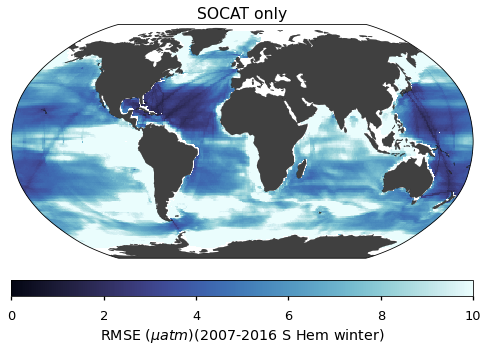

In [77]:
vrange = [0, 10, 1]
fig_shape = (1,1)
cmap = cm.cm.ice
lab = f'RMSE ($\mu atm$)(2007-2016 S Hem winter)'
   
      
with plt.style.context('seaborn-talk'):
    fig = plt.figure(figsize=(15,5))

    ### Mask
    dia = SpatialMap2(nrows_ncols=fig_shape, fig=fig, cbar_location='bottom', cbar_orientation='horizontal')
    
    
    map_sel = np.nanmean(RMSE_socat_map_0616, axis=0)
    sub = dia.add_plot(lat = RMSE_socat_map_0616['ylat'], 
                           lon = RMSE_socat_map_0616['xlon'], 
                           data = map_sel, 
                           vrange=vrange[0:2],
                           shading='flat',
                           cmap=cmap, 
                           ax=0)
    #print(np.nanmean(np.abs(map_sel.T)))
    dia.set_title("SOCAT only", 0, loc="center")
    
    col = dia.add_colorbar(sub)
    dia.set_cbar_xlabel(col, lab)
    dia.grid[0].gridlines(draw_labels=True)

#fig.savefig(f"{fig_output_dir}/Bias_Maps_Residual_saildrone5_10yrs.jpg",dpi=300)

/home/theimdal/.conda/envs/cesm_play/lib/python3.8/site-packages/dask/array/numpy_compat.py:39: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
<ipython-input-19-2d3b70552774>:13: RuntimeWarning: Mean of empty slice
  map_sel = np.nanmean(map_new_RMSE_sail5_0616, axis=0)
/home/theimdal/.conda/envs/cesm_play/lib/python3.8/site-packages/cartopy/mpl/geoaxes.py:1597: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  X, Y, C, shading = self._pcolorargs('pcolormesh', *args,
<ipython-input-19-2d3b70552774>:25: RuntimeWarning: Mean of empty slice
  map_sel = np.nanmean(map_new_RMSE_sail10_0616, axis=0)
<ipython-input-19-2d3b70552774>:35: RuntimeWarning: Mean of empty slice
  map_sel = np.nanmean(

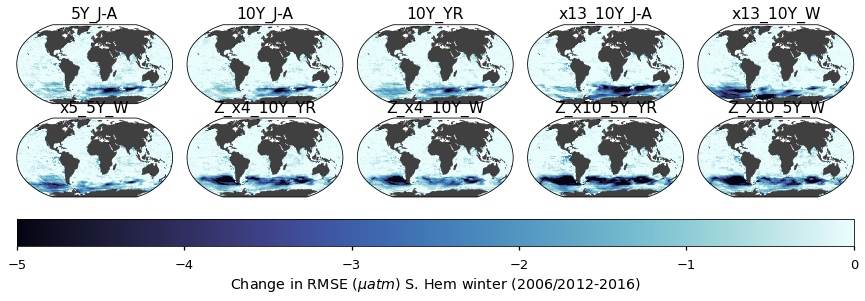

In [19]:
vrange = [-5, 0, 1]
fig_shape = (2,5)
cmap = cm.cm.ice
lab = f'Change in RMSE ($\mu atm$) S. Hem winter (2006/2012-2016)'
   
      
with plt.style.context('seaborn-talk'):
    fig = plt.figure(figsize=(15,5))

    ### Mask
    dia = SpatialMap2(nrows_ncols=fig_shape, fig=fig, cbar_location='bottom', cbar_orientation='horizontal')
    
    map_sel = np.nanmean(map_new_RMSE_sail5_0616, axis=0)
    sub = dia.add_plot(lat = map_new_RMSE_sail5_0616['ylat'], 
                           lon = map_new_RMSE_sail5_0616['xlon'], 
                           data = map_sel, 
                           vrange=vrange[0:2],
                           shading='flat',
                           cmap=cmap, 
                           ax=0)
    #print(np.nanmean(np.abs(map_sel.T)))
    dia.set_title("5Y_J-A", 0, loc="center")
    
    
    map_sel = np.nanmean(map_new_RMSE_sail10_0616, axis=0)
    sub = dia.add_plot(lat = map_new_RMSE_sail10_0616['ylat'], 
                           lon = map_new_RMSE_sail10_0616['xlon'], 
                           data = map_sel, 
                           vrange=vrange[0:2],
                           shading='flat',
                           cmap=cmap, 
                           ax=1)
    dia.set_title("10Y_J-A", 1, loc="center")
    
    map_sel = np.nanmean(map_new_RMSE_sail10_shifted_0616, axis=0)
    sub = dia.add_plot(lat = map_new_RMSE_sail10_shifted_0616['ylat'], 
                           lon = map_new_RMSE_sail10_shifted_0616['xlon'], 
                           data = map_sel, 
                           vrange=vrange[0:2],
                           shading='flat',
                           cmap=cmap, 
                           ax=2)
    dia.set_title("10Y_YR", 2, loc="center")
    
    map_sel = np.nanmean(map_new_RMSE_sail10_12x_0616, axis=0)
    sub = dia.add_plot(lat = map_new_RMSE_sail10_12x_0616['ylat'], 
                           lon = map_new_RMSE_sail10_12x_0616['xlon'], 
                           data = map_sel, 
                           vrange=vrange[0:2],
                           shading='flat',
                           cmap=cmap, 
                           ax=3)
    dia.set_title("x13_10Y_J-A", 3, loc="center")
    
    map_sel = np.nanmean(map_new_RMSE_sail10_12x_w_0616, axis=0)
    sub = dia.add_plot(lat = map_new_RMSE_sail10_12x_w_0616['ylat'], 
                           lon = map_new_RMSE_sail10_12x_w_0616['xlon'], 
                           data = map_sel, 
                           vrange=vrange[0:2],
                           shading='flat',
                           cmap=cmap, 
                           ax=4)
    dia.set_title("x13_10Y_W", 4, loc="center")
    
    map_sel = np.nanmean(map_new_RMSE_sail5_5x_0616, axis=0)
    sub = dia.add_plot(lat = map_new_RMSE_sail5_5x_0616['ylat'], 
                           lon = map_new_RMSE_sail5_5x_0616['xlon'], 
                           data = map_sel, 
                           vrange=vrange[0:2],
                           shading='flat',
                           cmap=cmap, 
                           ax=5)
    dia.set_title("x5_5Y_W", 5, loc="center")
    
    
    map_sel = np.nanmean(map_new_RMSE_sail_zigzag_10_0616, axis=0)
    sub = dia.add_plot(lat = map_new_RMSE_sail_zigzag_10_0616['ylat'], 
                           lon = map_new_RMSE_sail_zigzag_10_0616['xlon'], 
                           data = map_sel, 
                           vrange=vrange[0:2],
                           shading='flat',
                           cmap=cmap, 
                           ax=6)
    dia.set_title("Z_x4_10Y_YR", 6, loc="center")
    
    map_sel = np.nanmean(map_new_RMSE_sail_zigzag_10_w_0616, axis=0)
    sub = dia.add_plot(lat = map_new_RMSE_sail_zigzag_10_w_0616['ylat'], 
                           lon = map_new_RMSE_sail_zigzag_10_w_0616['xlon'], 
                           data = map_sel, 
                           vrange=vrange[0:2],
                           shading='flat',
                           cmap=cmap, 
                           ax=7)
    dia.set_title("Z_x4_10Y_W", 7, loc="center")
    
    map_sel = np.nanmean(map_new_RMSE_sail_zigzag_5_0616, axis=0)
    sub = dia.add_plot(lat = map_new_RMSE_sail_zigzag_5_0616['ylat'], 
                           lon = map_new_RMSE_sail_zigzag_5_0616['xlon'], 
                           data = map_sel, 
                           vrange=vrange[0:2],
                           shading='flat',
                           cmap=cmap, 
                           ax=8)
    dia.set_title("Z_x10_5Y_YR", 8, loc="center")
    
    map_sel = np.nanmean(map_new_RMSE_sail_zigzag_5_w_0616, axis=0)
    sub = dia.add_plot(lat = map_new_RMSE_sail_zigzag_5_w_0616['ylat'], 
                           lon = map_new_RMSE_sail_zigzag_5_w_0616['xlon'], 
                           data = map_sel, 
                           vrange=vrange[0:2],
                           shading='flat',
                           cmap=cmap, 
                           ax=9)
    #print(np.nanmean(np.abs(map_sel.T)))
    dia.set_title("Z_x10_5Y_W", 9, loc="center")
    
    
    col = dia.add_colorbar(sub)
    dia.set_cbar_xlabel(col, lab)
    #dia.grid[0].gridlines(draw_labels=True)

#fig.savefig(f"{fig_output_dir}/Bias_Maps_Residual_saildrone5_10yrs.jpg",dpi=300)